<a href="https://colab.research.google.com/github/fahiranurulichzza/Delivery_Time_Prediction/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Data Json
df = pd.read_json("https://raw.githubusercontent.com/indrasetiadhip/data-task-sample/main/data-sample.json")
df.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


In [ ]:
#Spliting colomn 
new_df = df.copy()
new_df = pd.concat([new_df, new_df["taskLocationDone"].apply(pd.Series)], axis=1)
new_df = pd.concat([new_df, new_df["cod"].apply(pd.Series)], axis=1)
new_df = pd.concat([new_df, new_df["UserVar"].apply(pd.Series).drop("taskStatus", axis=1)], axis=1)
new_df.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,amount,received,0,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,685000.0,True,NaN,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,53500.0,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,179500.0,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,31815.0,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,144562.0,True,NaN,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK


In [ ]:
new_df.drop(["taskLocationDone", "cod", 0, 0, "UserVar"], axis=1, inplace=True)

#Data Preparation

In [ ]:
#Check Duplicate Value
new_df.duplicated().sum()

0

In [ ]:
#Check Missing Value
new_df.isna().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
lon                       768
lat                       768
amount                   5976
received                 5976
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
dtype: int64

In [ ]:
new_df[new_df["taskStatus"] == "done"]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK


##Case 1: taskCompletedTime = NaN, taskStatus = done. Drop raw data

In [ ]:
new_df = new_df[~((new_df["lat"].isna()) & (new_df["taskCompletedTime"].isna()) & (new_df["taskStatus"] == "done"))]

In [ ]:
new_df.isna().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         762
taskStatus                  0
flow                        0
taskId                      0
lon                       762
lat                       762
amount                   5970
received                 5970
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
dtype: int64

##Case 2: taskCompletedTime = NaN, taskStatus = ongoing. Drop raw data

In [ ]:
new_df = new_df[~((new_df["lat"].isna()) & (new_df["taskCompletedTime"].isna()) & (new_df["taskStatus"] == "ongoing"))]

In [ ]:
new_df.isna().sum()

taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime           0
taskStatus                  0
flow                        0
taskId                      0
lon                         0
lat                         0
amount                   5592
received                 5592
branch_dest                 0
taskStatusLabel             0
receiver_city              46
taskDetailStatusLabel       0
taskDetailStatus            0
weight                      0
branch_origin             279
dtype: int64

In [ ]:
new_df["taskStatus"].value_counts()

done    7566
Name: taskStatus, dtype: int64

In [ ]:
new_df["received"].value_counts()

False    1279
True      695
Name: received, dtype: int64

##Case 3: branch_origin = None (Unknown Location), amount = NaN. Drop Raw Data

In [ ]:
new_df = new_df[~((new_df["branch_origin"].isna()) & (new_df["amount"].isna()))]

In [ ]:
new_df.isnull().sum()

taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime           0
taskStatus                  0
flow                        0
taskId                      0
lon                         0
lat                         0
amount                   5341
received                 5341
branch_dest                 0
taskStatusLabel             0
receiver_city              43
taskDetailStatusLabel       0
taskDetailStatus            0
weight                      0
branch_origin              28
dtype: int64

In [ ]:
new_df["branch_origin"].fillna("Unknown Location", inplace=True)

In [ ]:
new_df["branch_origin"].value_counts()

CGK                 5027
BDO                  308
TGR                  208
JOG                  165
SUB                  158
BOO                  141
SRG                   86
DPK                   80
CBN                   74
MES                   72
SOC                   70
UPG                   69
BKI                   68
KOE                   55
DPS                   48
SMD                   40
PNK                   38
TKG                   36
PLM                   36
PKU                   34
SMI                   34
CLG                   31
BPN                   29
Unknown Location      28
PGK                   27
MXG                   26
MDN                   26
KRW                   25
MJK                   25
JBR                   24
TSM                   22
AMI                   22
KDR                   18
BDJ                   18
PBL                   17
PDG                   17
BTH                   12
MGL                   12
PSR                   11
KDI                   11


In [ ]:
new_df.isnull().sum()

taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime           0
taskStatus                  0
flow                        0
taskId                      0
lon                         0
lat                         0
amount                   5341
received                 5341
branch_dest                 0
taskStatusLabel             0
receiver_city              43
taskDetailStatusLabel       0
taskDetailStatus            0
weight                      0
branch_origin               0
dtype: int64

In [ ]:
new_df[~((new_df["amount"].isna()) & (new_df["taskStatusLabel"] == "Failed"))].taskStatusLabel.value_counts()

Success    5207
Failed     1235
Name: taskStatusLabel, dtype: int64

##Case 4: amount = NaN, taskStatusLabel = Failed. Drop Raw Data

In [ ]:
new_df = new_df[~((new_df["amount"].isna()) & (new_df["taskStatusLabel"] == "Failed"))]

In [ ]:
new_df.isnull().sum()

taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime           0
taskStatus                  0
flow                        0
taskId                      0
lon                         0
lat                         0
amount                   4468
received                 4468
branch_dest                 0
taskStatusLabel             0
receiver_city              34
taskDetailStatusLabel       0
taskDetailStatus            0
weight                      0
branch_origin               0
dtype: int64

##Case 5: receive=NaN, taskStatusLabel = Success. Fill Receive = TRUE

In [ ]:
new_df["received"].value_counts()

False    1279
True      695
Name: received, dtype: int64

In [ ]:
new_df[((new_df["received"].isna()) & (new_df["taskStatusLabel"] == "Success"))]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin
73,2022-11-01 09:31:32 +0700,enragedLlama3,2022-11-01 13:14:31 +0700,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,NaN,NaN,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1,MES
677,2022-11-02 07:47:42 +0700,decimalZebra7,2022-11-02 08:06:28 +0700,done,Delivery,2418d4e99633a437fb1c,107.120611,-6.269069,NaN,NaN,CKR,Success,"CIBITUNG,CIKARANG",YANG BERSANGKUTAN,D01,5,SRG
678,2022-11-02 07:51:21 +0700,resolvedVenison5,2022-11-02 08:06:31 +0700,done,Delivery,9615a1f7267a2ee926b4,112.612591,-7.966881,NaN,NaN,MXG,Success,MALANG,YANG BERSANGKUTAN,D01,1,KDR
679,2022-11-02 07:42:09 +0700,bubblyBobolink6,2022-11-02 09:06:30 +0800,done,Delivery,8746c36d8f36b2c1971d,119.488295,-5.114087,NaN,NaN,UPG,Success,MAKASAR,KELUARGA/SAUDARA,D09,13,CBN
682,2022-11-02 08:04:14 +0700,pitifulMagpie9,2022-11-02 08:06:35 +0700,done,Delivery,79063a5594efcb9cd45d,102.945948,-3.195806,NaN,NaN,PLM,Success,"BTS ULU,MUARA BELITI",YANG BERSANGKUTAN,D01,0.12,CGK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,2022-11-10 07:27:51 +0700,dearWhiting2,2022-11-10 09:38:02 +0700,done,Delivery,4df98016923e193d39ec,101.438664,0.479580,NaN,NaN,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK
8328,2022-11-10 07:46:14 +0700,emptyPretzels3,2022-11-10 09:37:50 +0700,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,NaN,NaN,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK


In [ ]:
new_df["received"].fillna("True", inplace=True)

In [ ]:
new_df.isnull().sum()

taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime           0
taskStatus                  0
flow                        0
taskId                      0
lon                         0
lat                         0
amount                   4468
received                    0
branch_dest                 0
taskStatusLabel             0
receiver_city              34
taskDetailStatusLabel       0
taskDetailStatus            0
weight                      0
branch_origin               0
dtype: int64

In [ ]:
new_df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK


##Add colomn 'delivery_time'

In [ ]:
datetime_columns = ["taskCreatedTime", "taskCompletedTime"]

for column in datetime_columns:
  new_df[column] = pd.to_datetime(new_df[column], utc=True).map(lambda x: x.tz_convert('Asia/Jakarta'))

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6442 entries, 0 to 8333
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype                       
---  ------                 --------------  -----                       
 0   taskCreatedTime        6442 non-null   datetime64[ns, Asia/Jakarta]
 1   taskAssignedTo         6442 non-null   object                      
 2   taskCompletedTime      6442 non-null   datetime64[ns, Asia/Jakarta]
 3   taskStatus             6442 non-null   object                      
 4   flow                   6442 non-null   object                      
 5   taskId                 6442 non-null   object                      
 6   lon                    6442 non-null   float64                     
 7   lat                    6442 non-null   float64                     
 8   amount                 1974 non-null   float64                     
 9   received               6442 non-null   object                      
 10  branch_dest 

In [ ]:
new_df[datetime_columns]

,taskCreatedTime,taskCompletedTime
0,2022-11-01 20:17:26+07:00,2022-11-01 20:46:30+07:00
1,2022-11-01 08:41:07+07:00,2022-11-01 12:33:48+07:00
2,2022-11-01 08:41:07+07:00,2022-11-01 13:41:57+07:00
3,2022-11-01 08:41:07+07:00,2022-11-01 18:18:19+07:00
4,2022-11-01 08:41:07+07:00,2022-11-01 10:51:49+07:00
...,...,...
8328,2022-11-10 07:46:14+07:00,2022-11-10 09:37:50+07:00
8329,2022-11-10 09:07:12+07:00,2022-11-10 09:38:04+07:00
8331,2022-11-10 09:36:44+07:00,2022-11-10 09:37:55+07:00
8332,2022-11-10 07:25:40+07:00,2022-11-10 09:37:53+07:00


In [ ]:
new_df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK


In [ ]:
delivery_time = new_df["taskCompletedTime"] - new_df["taskCreatedTime"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
new_df["delivery_time"] = round(delivery_time/3600, 2) 
new_df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,0.48
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,3.88
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,5.01
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,9.62
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,2.18


##EDA 

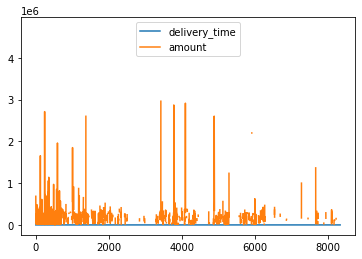

In [ ]:
new_df[["delivery_time", "amount"]].plot()
plt.show()

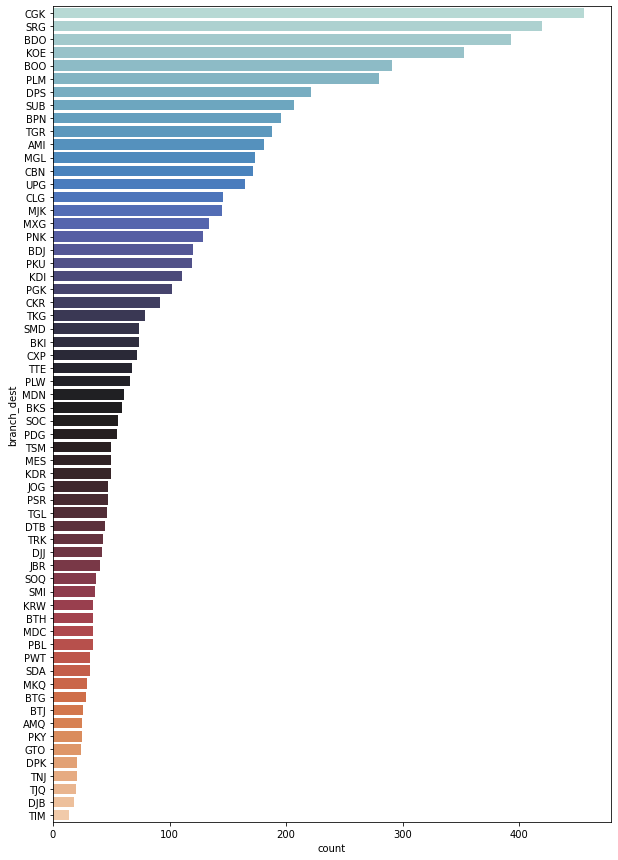

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(y ='branch_dest', data = new_df, order = new_df['branch_dest'].value_counts().index, palette='icefire')
plt.show()

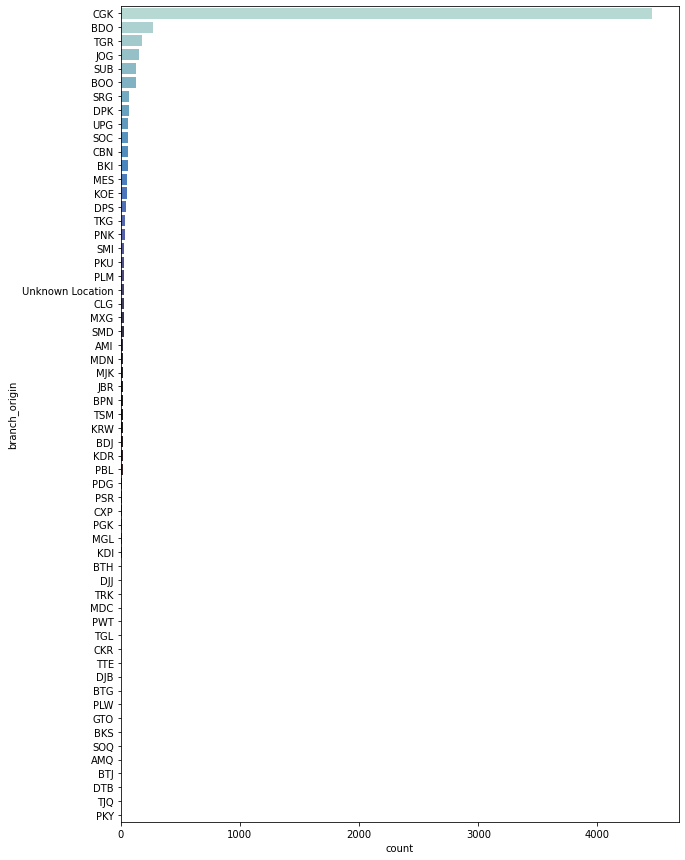

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(y ='branch_origin', data = new_df, order = new_df['branch_origin'].value_counts().index, palette='icefire')
plt.show()

#Amount's Prediction

In [ ]:
#Split data that haven't NaN on Amount's Colomn
completed_new_df = new_df[~new_df.amount.isna()]
completed_new_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,0.48
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,3.88
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,5.01
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,9.62
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,2022-11-10 09:19:14+07:00,brainyBasmati9,2022-11-10 09:38:08+07:00,done,Delivery,696decc0bf5990af6b38,0.000000,0.000000,319000.0,False,BOO,Failed,"CILEUNGSI,KAB.BOGOR",PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN),U21,0.2,CGK,0.32
8299,2022-11-10 09:07:18+07:00,guiltyEggs0,2022-11-10 09:38:34+07:00,done,Delivery,92ec2704c98ef43b9364,114.572112,-0.614358,155000.0,False,BDJ,Failed,"TANAH SIANG,PURUKCAH",HOLD FOR FURTHER INSTRUCTI0N,CR5,1,CGK,0.52
8303,2022-11-10 09:27:58+07:00,similarDunbird5,2022-11-10 09:38:33+07:00,done,Delivery,c57cf6a756c579652ea0,104.233347,1.069963,158000.0,False,TNJ,Failed,SERI/SRI KUALA LOBAM,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,CGK,0.18
8309,2022-11-10 09:36:24+07:00,amusedMagpie2,2022-11-10 09:37:58+07:00,done,Delivery,df65494d42a5bfacd3e7,106.859971,-6.677038,80499.0,False,BOO,Failed,"CISARUA,KAB.BOGOR",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,2,CGK,0.03


In [ ]:
#Split data that have NaN on Amount's Colomn
nan_df = new_df[new_df.amount.isna()]
nan_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
73,2022-11-01 09:31:32+07:00,enragedLlama3,2022-11-01 13:14:31+07:00,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,NaN,True,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1,MES,3.72
677,2022-11-02 07:47:42+07:00,decimalZebra7,2022-11-02 08:06:28+07:00,done,Delivery,2418d4e99633a437fb1c,107.120611,-6.269069,NaN,True,CKR,Success,"CIBITUNG,CIKARANG",YANG BERSANGKUTAN,D01,5,SRG,0.31
678,2022-11-02 07:51:21+07:00,resolvedVenison5,2022-11-02 08:06:31+07:00,done,Delivery,9615a1f7267a2ee926b4,112.612591,-7.966881,NaN,True,MXG,Success,MALANG,YANG BERSANGKUTAN,D01,1,KDR,0.25
679,2022-11-02 07:42:09+07:00,bubblyBobolink6,2022-11-02 08:06:30+07:00,done,Delivery,8746c36d8f36b2c1971d,119.488295,-5.114087,NaN,True,UPG,Success,MAKASAR,KELUARGA/SAUDARA,D09,13,CBN,0.41
682,2022-11-02 08:04:14+07:00,pitifulMagpie9,2022-11-02 08:06:35+07:00,done,Delivery,79063a5594efcb9cd45d,102.945948,-3.195806,NaN,True,PLM,Success,"BTS ULU,MUARA BELITI",YANG BERSANGKUTAN,D01,0.12,CGK,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,2022-11-10 07:27:51+07:00,dearWhiting2,2022-11-10 09:38:02+07:00,done,Delivery,4df98016923e193d39ec,101.438664,0.479580,NaN,True,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK,2.17
8328,2022-11-10 07:46:14+07:00,emptyPretzels3,2022-11-10 09:37:50+07:00,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,NaN,True,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK,1.86
8329,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,True,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,0.51
8331,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,True,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,0.02


In [ ]:
#Select feature
predict_df = completed_new_df[['amount','branch_dest','branch_origin','weight','delivery_time']]
predict_df

,amount,branch_dest,branch_origin,weight,delivery_time
0,685000.0,SRG,CGK,13,0.48
1,53500.0,MGL,CGK,1.3,3.88
2,179500.0,MGL,CGK,3,5.01
3,31815.0,MGL,CGK,0.625,9.62
4,144562.0,MGL,CGK,3,2.18
...,...,...,...,...,...
8286,319000.0,BOO,CGK,0.2,0.32
8299,155000.0,BDJ,CGK,1,0.52
8303,158000.0,TNJ,CGK,1,0.18
8309,80499.0,BOO,CGK,2,0.03


## Label Encoder

In [ ]:
#get the list of all object columns
predict_df.select_dtypes('object').columns

Index(['branch_dest', 'branch_origin', 'weight'], dtype='object')

In [ ]:
#change the type of data into string
predict_df['weight'] = predict_df['weight'].astype(float) 

<ipython-input-467-4b71dce8670b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['weight'] = predict_df['weight'].astype(float)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
#Label encode the categorical's data 
le_branch_dest = preprocessing.LabelEncoder()
le_branch_dest.fit(new_df["branch_dest"])

le_branch_origin = preprocessing.LabelEncoder()
le_branch_origin.fit(new_df["branch_origin"])

predict_df["branch_dest"] = le_branch_dest.transform(predict_df["branch_dest"])
predict_df["branch_origin"] = le_branch_origin.transform(predict_df["branch_origin"])

<ipython-input-469-e521f49d5a8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df["branch_dest"] = le_branch_dest.transform(predict_df["branch_dest"])
<ipython-input-469-e521f49d5a8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df["branch_origin"] = le_branch_origin.transform(predict_df["branch_origin"])


In [ ]:
predict_df.head(10)

,amount,branch_dest,branch_origin,weight,delivery_time
0,685000.0,50,12,13.000,0.48
1,53500.0,31,12,1.300,3.88
2,179500.0,31,12,3.000,5.01
3,31815.0,31,12,0.625,9.62
4,144562.0,31,12,3.000,2.18
5,206610.0,31,12,2.500,10.89
6,38200.0,50,12,0.700,8.76
7,33000.0,50,12,0.040,1.36
8,65867.0,31,12,0.800,6.43
9,26800.0,31,12,0.100,6.39


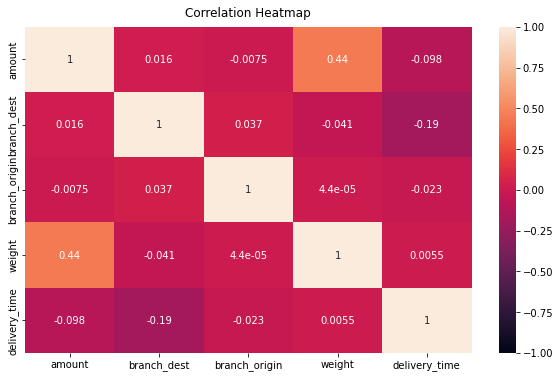

In [ ]:
#Correlation of Features
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(predict_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

## Split Dataset

In [ ]:
#Split data into X and Y
X = predict_df.drop(columns="amount", axis=1)
Y = predict_df["amount"]
X.head(10)

,branch_dest,branch_origin,weight,delivery_time
0,50,12,13.000,0.48
1,31,12,1.300,3.88
2,31,12,3.000,5.01
3,31,12,0.625,9.62
4,31,12,3.000,2.18
5,31,12,2.500,10.89
6,50,12,0.700,8.76
7,50,12,0.040,1.36
8,31,12,0.800,6.43
9,31,12,0.100,6.39


In [ ]:
Y.head(5).reset_index()

,index,amount
0,0,685000.0
1,1,53500.0
2,2,179500.0
3,3,31815.0
4,4,144562.0


In [ ]:
from sklearn.model_selection import train_test_split
# test size 0.2 mean is 80% goes to training data, and 20% goes to testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1974, 4) (1579, 4) (395, 4)


## Modeling

In [ ]:
# Dataframe for evaluation 
models = pd.DataFrame(
    index=['train_mae', 'test_mae'],
    columns=['LinearRegression', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting data training to algoritma linearregression
model_lr = LinearRegression().fit(X_train, Y_train)

model_lr

LinearRegression()

In [ ]:
# Import library
from sklearn.ensemble import RandomForestRegressor
 
# Build prediction model
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

In [ ]:
# Import MAE
from sklearn.metrics import mean_absolute_error
 
# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LinearRegression': model_lr, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = round(mean_absolute_error(y_true=Y_train, y_pred=model.predict(X_train)))
    mae.loc[name, 'test'] = round(mean_absolute_error(y_true=Y_test, y_pred=model.predict(X_test)))

# Panggil mae
mae

,train,test
LinearRegression,101602,118330
RF,42312,100212
Boosting,101610,122613


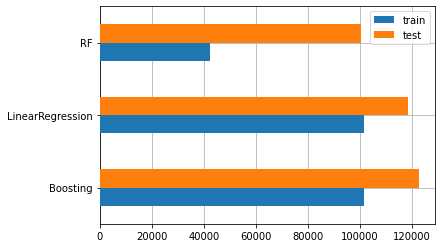

In [ ]:
# Plot evaluasi
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[[0]].copy()
pred = {'y_aktual':Y_test.iloc[0]}

for name, model in model_dict.items():
    pred['Prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred)

,y_aktual,Prediksi_LinearRegression,Prediksi_RF,Prediksi_Boosting
0,234465.0,141907.2,76832.5,101083.2


In [ ]:
import joblib
  
# Save the trained model as a joblib string.
saved_model = joblib.dump(RF, "/content/saved_modelRF.joblib")
  

##Predict Amount

In [ ]:
test_df = nan_df[['amount','branch_dest','branch_origin','weight','delivery_time']]
test_df

,amount,branch_dest,branch_origin,weight,delivery_time
73,NaN,DTB,MES,1,3.72
677,NaN,CKR,SRG,5,0.31
678,NaN,MXG,KDR,1,0.25
679,NaN,UPG,CBN,13,0.41
682,NaN,PLM,CGK,0.12,0.04
...,...,...,...,...,...
8327,NaN,PKU,CGK,1,2.17
8328,NaN,CGK,CGK,1,1.86
8329,NaN,CGK,CGK,1,0.51
8331,NaN,TKG,CGK,1.44,0.02


In [ ]:
test_df["branch_dest"] = le_branch_dest.transform(test_df["branch_dest"])
test_df["branch_origin"] = le_branch_origin.transform(test_df["branch_origin"])

<ipython-input-484-89e0cc793c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["branch_dest"] = le_branch_dest.transform(test_df["branch_dest"])
<ipython-input-484-89e0cc793c53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["branch_origin"] = le_branch_origin.transform(test_df["branch_origin"])


In [ ]:
#Split data to X and Y
X = test_df.drop(columns="amount", axis=1)
Y = test_df["amount"]
X.head(10)

,branch_dest,branch_origin,weight,delivery_time
73,20,30,1,3.72
677,13,48,5,0.31
678,34,25,1,0.25
679,61,11,13,0.41
682,40,12,0.12,0.04
692,51,14,1,0.02
693,17,51,8,0.88
694,26,12,3.5,0.99
695,26,12,10.6,0.80
698,7,12,0.95,0.55


In [ ]:
# Load the joblib model
RF_from_joblib = joblib.load("/content/saved_modelRF.joblib")
  
# Use the loaded joblib model to make predictions
prediction = RF_from_joblib.predict(X)

In [ ]:
prediction.round(2)

array([ 26340.  , 494925.35, 174842.22, ..., 199704.84, 278969.06,
       203154.35])

In [ ]:
new_nan_predict_df_1 = test_df.copy()
new_nan_predict_df_1.insert(loc=1, column="amount_pred", value=prediction.round(2), allow_duplicates=False)
new_nan_predict_df_1

,amount,amount_pred,branch_dest,branch_origin,weight,delivery_time
73,NaN,26340.00,20,30,1,3.72
677,NaN,494925.35,13,48,5,0.31
678,NaN,174842.22,34,25,1,0.25
679,NaN,665079.52,61,11,13,0.41
682,NaN,112852.60,40,12,0.12,0.04
...,...,...,...,...,...,...
8327,NaN,190683.63,38,12,1,2.17
8328,NaN,191543.83,12,12,1,1.86
8329,NaN,199704.84,12,12,1,0.51
8331,NaN,278969.06,56,12,1.44,0.02


In [ ]:
nan_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
73,2022-11-01 09:31:32+07:00,enragedLlama3,2022-11-01 13:14:31+07:00,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,NaN,True,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1,MES,3.72
677,2022-11-02 07:47:42+07:00,decimalZebra7,2022-11-02 08:06:28+07:00,done,Delivery,2418d4e99633a437fb1c,107.120611,-6.269069,NaN,True,CKR,Success,"CIBITUNG,CIKARANG",YANG BERSANGKUTAN,D01,5,SRG,0.31
678,2022-11-02 07:51:21+07:00,resolvedVenison5,2022-11-02 08:06:31+07:00,done,Delivery,9615a1f7267a2ee926b4,112.612591,-7.966881,NaN,True,MXG,Success,MALANG,YANG BERSANGKUTAN,D01,1,KDR,0.25
679,2022-11-02 07:42:09+07:00,bubblyBobolink6,2022-11-02 08:06:30+07:00,done,Delivery,8746c36d8f36b2c1971d,119.488295,-5.114087,NaN,True,UPG,Success,MAKASAR,KELUARGA/SAUDARA,D09,13,CBN,0.41
682,2022-11-02 08:04:14+07:00,pitifulMagpie9,2022-11-02 08:06:35+07:00,done,Delivery,79063a5594efcb9cd45d,102.945948,-3.195806,NaN,True,PLM,Success,"BTS ULU,MUARA BELITI",YANG BERSANGKUTAN,D01,0.12,CGK,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,2022-11-10 07:27:51+07:00,dearWhiting2,2022-11-10 09:38:02+07:00,done,Delivery,4df98016923e193d39ec,101.438664,0.479580,NaN,True,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK,2.17
8328,2022-11-10 07:46:14+07:00,emptyPretzels3,2022-11-10 09:37:50+07:00,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,NaN,True,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK,1.86
8329,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,True,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,0.51
8331,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,True,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,0.02


In [ ]:
new_nan_df = nan_df.copy()
new_nan_df.drop(columns="amount", axis=1, inplace=True)
new_nan_df.insert(loc=8, column="amount", value=prediction.round(2), allow_duplicates=False)
new_nan_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
73,2022-11-01 09:31:32+07:00,enragedLlama3,2022-11-01 13:14:31+07:00,done,Delivery,b7f9f3f96def6b866166,98.814915,1.713917,26340.00,True,DTB,Success,"SARUDIK,TAPANULI TEN",YANG BERSANGKUTAN,D01,1,MES,3.72
677,2022-11-02 07:47:42+07:00,decimalZebra7,2022-11-02 08:06:28+07:00,done,Delivery,2418d4e99633a437fb1c,107.120611,-6.269069,494925.35,True,CKR,Success,"CIBITUNG,CIKARANG",YANG BERSANGKUTAN,D01,5,SRG,0.31
678,2022-11-02 07:51:21+07:00,resolvedVenison5,2022-11-02 08:06:31+07:00,done,Delivery,9615a1f7267a2ee926b4,112.612591,-7.966881,174842.22,True,MXG,Success,MALANG,YANG BERSANGKUTAN,D01,1,KDR,0.25
679,2022-11-02 07:42:09+07:00,bubblyBobolink6,2022-11-02 08:06:30+07:00,done,Delivery,8746c36d8f36b2c1971d,119.488295,-5.114087,665079.52,True,UPG,Success,MAKASAR,KELUARGA/SAUDARA,D09,13,CBN,0.41
682,2022-11-02 08:04:14+07:00,pitifulMagpie9,2022-11-02 08:06:35+07:00,done,Delivery,79063a5594efcb9cd45d,102.945948,-3.195806,112852.60,True,PLM,Success,"BTS ULU,MUARA BELITI",YANG BERSANGKUTAN,D01,0.12,CGK,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,2022-11-10 07:27:51+07:00,dearWhiting2,2022-11-10 09:38:02+07:00,done,Delivery,4df98016923e193d39ec,101.438664,0.479580,190683.63,True,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK,2.17
8328,2022-11-10 07:46:14+07:00,emptyPretzels3,2022-11-10 09:37:50+07:00,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,191543.83,True,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK,1.86
8329,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,199704.84,True,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,0.51
8331,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,278969.06,True,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,0.02


In [ ]:
new_nan_df.describe()

,lon,lat,amount,delivery_time
count,4468.000000,4468.000000,4.468000e+03,4468.000000
mean,74.207351,-3.702750,2.915288e+05,1.173997
std,53.153125,3.610597,3.367926e+05,1.254782
min,0.000000,-10.493658,2.321000e+04,0.000000
25%,0.000000,-6.963213,1.610591e+05,0.400000
50%,106.843164,-3.778501,2.113561e+05,0.790000
75%,112.659130,0.000000,2.743744e+05,1.380000
max,140.806424,3.765578,3.549113e+06,6.890000


In [ ]:
completed_new_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,0.48
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,3.88
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,5.01
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,9.62
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,2022-11-10 09:19:14+07:00,brainyBasmati9,2022-11-10 09:38:08+07:00,done,Delivery,696decc0bf5990af6b38,0.000000,0.000000,319000.0,False,BOO,Failed,"CILEUNGSI,KAB.BOGOR",PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN),U21,0.2,CGK,0.32
8299,2022-11-10 09:07:18+07:00,guiltyEggs0,2022-11-10 09:38:34+07:00,done,Delivery,92ec2704c98ef43b9364,114.572112,-0.614358,155000.0,False,BDJ,Failed,"TANAH SIANG,PURUKCAH",HOLD FOR FURTHER INSTRUCTI0N,CR5,1,CGK,0.52
8303,2022-11-10 09:27:58+07:00,similarDunbird5,2022-11-10 09:38:33+07:00,done,Delivery,c57cf6a756c579652ea0,104.233347,1.069963,158000.0,False,TNJ,Failed,SERI/SRI KUALA LOBAM,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,CGK,0.18
8309,2022-11-10 09:36:24+07:00,amusedMagpie2,2022-11-10 09:37:58+07:00,done,Delivery,df65494d42a5bfacd3e7,106.859971,-6.677038,80499.0,False,BOO,Failed,"CISARUA,KAB.BOGOR",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,2,CGK,0.03


In [ ]:
frame = [completed_new_df, new_nan_df]
final_completed_df = pd.concat(frame)
final_completed_df.reset_index(drop=True, inplace=True)
final_completed_df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,delivery_time
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.00,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,0.48
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.00,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,3.88
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.00,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,5.01
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.00,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,9.62
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.00,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,2022-11-10 07:27:51+07:00,dearWhiting2,2022-11-10 09:38:02+07:00,done,Delivery,4df98016923e193d39ec,101.438664,0.479580,190683.63,True,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK,2.17
6438,2022-11-10 07:46:14+07:00,emptyPretzels3,2022-11-10 09:37:50+07:00,done,Delivery,469a6678ea253784e7e3,0.000000,0.000000,191543.83,True,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK,1.86
6439,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,199704.84,True,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,0.51
6440,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,278969.06,True,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,0.02


In [ ]:
final_completed_df.isna().sum()

taskCreatedTime           0
taskAssignedTo            0
taskCompletedTime         0
taskStatus                0
flow                      0
taskId                    0
lon                       0
lat                       0
amount                    0
received                  0
branch_dest               0
taskStatusLabel           0
receiver_city            34
taskDetailStatusLabel     0
taskDetailStatus          0
weight                    0
branch_origin             0
delivery_time             0
dtype: int64

<Axes: >

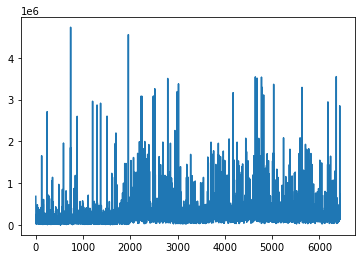

In [ ]:
final_completed_df.amount.plot()

#Delivery Time Prediction

In [ ]:
#Select feature
delivery_predict_df = final_completed_df[['amount','branch_dest','branch_origin','weight','delivery_time']]
delivery_predict_df

,amount,branch_dest,branch_origin,weight,delivery_time
0,685000.00,SRG,CGK,13,0.48
1,53500.00,MGL,CGK,1.3,3.88
2,179500.00,MGL,CGK,3,5.01
3,31815.00,MGL,CGK,0.625,9.62
4,144562.00,MGL,CGK,3,2.18
...,...,...,...,...,...
6437,190683.63,PKU,CGK,1,2.17
6438,191543.83,CGK,CGK,1,1.86
6439,199704.84,CGK,CGK,1,0.51
6440,278969.06,TKG,CGK,1.44,0.02


In [ ]:
#change the type of data into string
delivery_predict_df['weight'] = delivery_predict_df['weight'].astype(float)

<ipython-input-497-0c2cef6a5f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_predict_df['weight'] = delivery_predict_df['weight'].astype(float)


In [ ]:
delivery_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount         6442 non-null   float64
 1   branch_dest    6442 non-null   object 
 2   branch_origin  6442 non-null   object 
 3   weight         6442 non-null   float64
 4   delivery_time  6442 non-null   float64
dtypes: float64(3), object(2)
memory usage: 251.8+ KB


In [ ]:
delivery_predict_df["branch_dest"] = le_branch_dest.transform(delivery_predict_df["branch_dest"])
delivery_predict_df["branch_origin"] = le_branch_origin.transform(delivery_predict_df["branch_origin"])

<ipython-input-499-a3c41eea07ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_predict_df["branch_dest"] = le_branch_dest.transform(delivery_predict_df["branch_dest"])
<ipython-input-499-a3c41eea07ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_predict_df["branch_origin"] = le_branch_origin.transform(delivery_predict_df["branch_origin"])


In [ ]:
delivery_predict_df.head(10)

,amount,branch_dest,branch_origin,weight,delivery_time
0,685000.0,50,12,13.000,0.48
1,53500.0,31,12,1.300,3.88
2,179500.0,31,12,3.000,5.01
3,31815.0,31,12,0.625,9.62
4,144562.0,31,12,3.000,2.18
5,206610.0,31,12,2.500,10.89
6,38200.0,50,12,0.700,8.76
7,33000.0,50,12,0.040,1.36
8,65867.0,31,12,0.800,6.43
9,26800.0,31,12,0.100,6.39


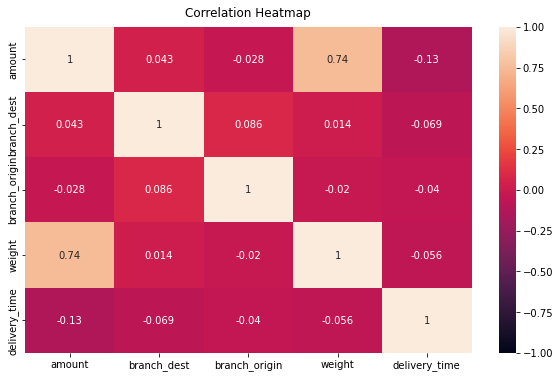

In [ ]:
#Correlation of Features
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(delivery_predict_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

In [ ]:
#Split data into X and Y
X_delivery = delivery_predict_df.drop(columns="delivery_time", axis=1)
Y_delivery = delivery_predict_df["delivery_time"]
X_delivery.head(10)

,amount,branch_dest,branch_origin,weight
0,685000.0,50,12,13.000
1,53500.0,31,12,1.300
2,179500.0,31,12,3.000
3,31815.0,31,12,0.625
4,144562.0,31,12,3.000
5,206610.0,31,12,2.500
6,38200.0,50,12,0.700
7,33000.0,50,12,0.040
8,65867.0,31,12,0.800
9,26800.0,31,12,0.100


In [ ]:
Y_delivery.head(5).reset_index()

,index,delivery_time
0,0,0.48
1,1,3.88
2,2,5.01
3,3,9.62
4,4,2.18


In [ ]:
# test size 0.2 mean is 80% goes to training data, and 20% goes to testing data
X_train_delv, X_test_delv, Y_train_delv, Y_test_delv = train_test_split(X_delivery, Y_delivery, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(4468, 4) (1579, 4) (395, 4)


In [ ]:
import lightgbm as lgb
import xgboost as xgb

In [ ]:
# Dataframe for evaluation 
models2 = pd.DataFrame(
    index=['train_mae', 'test_mae'],
    columns=['Lightgbm', 'XGBoost'])

In [ ]:
#LightGBM Model
LGB = lgb.LGBMRegressor()
LGB.fit(X_train_delv,Y_train_delv)

LGBMRegressor()

In [ ]:
#XGBoost Model
XGB = xgb.XGBRegressor()
XGB.fit(X_train_delv,Y_train_delv)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Import MAE
from sklearn.metrics import mean_absolute_error

# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['Lightgbm', 'XGBoost'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict2 = {'Lightgbm': LGB, 'XGBoost': XGB}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict2.items():
    mae.loc[name, 'train'] = round(mean_absolute_error(y_true=Y_train_delv, y_pred=model.predict(X_train_delv)),3)
    mae.loc[name, 'test'] = round(mean_absolute_error(y_true=Y_test_delv, y_pred=model.predict(X_test_delv)),3)

# Panggil mae
mae

,train,test
Lightgbm,0.84,0.976
XGBoost,0.57,1.015


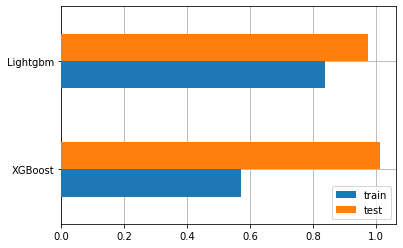

In [ ]:
# Plot evaluasi
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi2 = X_test_delv.iloc[[0]].copy()
pred = {'y_aktual':Y_test_delv.iloc[0]}

for name, model in model_dict2.items():
    pred['Prediksi_' + name] = model.predict(prediksi2).round(3)

pd.DataFrame(pred)

,y_aktual,Prediksi_Lightgbm,Prediksi_XGBoost
0,0.6,0.408,0.569


**CONCLUSION**


*   **Amount's Prediction**, model yang baik digunakan yaitu Random Forest
*   **Delivery Time's Prediction**, model yang baik digunakan yaitu LightGBM



**Next Step:**
Langkah selanjutnya bisa **tuning hyperparameter** untuk mendapatkan best_parameter, lalu dapat dilakukan **deploy** ke website atau produk aplication